# Retail Data Wrangling and Analytics

In [0]:
# Import modules 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Load CSV into Dataframe
Alternatively, the LGS IT team also dumped the transactional data into a [CSV file](https://raw.githubusercontent.com/jarviscanada/jarvis_data_eng_demo/feature/data/python_data_wrangling/data/online_retail_II.csv). However, the CSV header (column names) doesn't follow the snakecase or camelcase naming convention (e.g. `Customer ID` instead of `customer_id` or `CustomerID`). As a result, you will need to use Pandas to clean up the data before doing any analytics. In addition, unlike the PSQL scheme, CSV files do not have data types associated. Therefore, you will need to cast/convert certain columns into correct data types (e.g. DateTime, numbers, etc..)

**Data Preperation**

- Read the `data/online_retail_II.csv` file into a DataFrame
- Rename all columns to upper camelcase or snakecase
- Convert/cast all columns to the appropriate data types (e.g. datetime)

In [0]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, TimestampType, FloatType

schema = StructType([
    StructField("Invoice", StringType(), True), 
    StructField("StockCode", StringType(), True),
    StructField("Description", StringType(), True),
    StructField("Quantity", IntegerType(), True),
    StructField("InvoiceDate", TimestampType(), True),
    StructField("Price", FloatType(), True),
    StructField("Customer ID", FloatType(), True),
    StructField("Country", StringType(), True)
])
file_location = "dbfs:/FileStore/tables/online_retail_II.csv"
retail_df = spark.read.format("csv").option("header", "true").schema(schema).load(file_location)
retail_df = (retail_df
             .withColumnRenamed("Invoice", "invoice")
             .withColumnRenamed("StockCode", "stock_code")
             .withColumnRenamed("Description", "description")
             .withColumnRenamed("Quantity", "quantity")
             .withColumnRenamed("InvoiceDate", "invoice_date")
             .withColumnRenamed("Price", "price")
             .withColumnRenamed("Customer ID", "customer_id")
             .withColumnRenamed("Country", "country")
)
spark.sql("DROP TABLE IF EXISTS online_retail_ii")
retail_df.write.mode("overwrite").saveAsTable("online_retail_ii")
display(retail_df)

invoice stock_code description quantity invoice_date price customer_id country 489434 85048 15CM CHRISTMAS GLASS BALL 20 LIGHTS 12 2009-12-01T07:45:00Z 6.95 13085.0 United Kingdom 489434 79323P PINK CHERRY LIGHTS 12 2009-12-01T07:45:00Z 6.75 13085.0 United Kingdom 489434 79323W WHITE CHERRY LIGHTS 12 2009-12-01T07:45:00Z 6.75 13085.0 United Kingdom 489434 22041 "RECORD FRAME 7"" SINGLE SIZE " 48 2009-12-01T07:45:00Z 2.1 13085.0 United Kingdom 489434 21232 STRAWBERRY CERAMIC TRINKET BOX 24 2009-12-01T07:45:00Z 1.25 13085.0 United Kingdom 489434 22064 PINK DOUGHNUT TRINKET POT 24 2009-12-01T07:45:00Z 1.65 13085.0 United Kingdom 489434 21871 SAVE THE PLANET MUG 24 2009-12-01T07:45:00Z 1.25 13085.0 United Kingdom 489434 21523 FANCY FONT HOME SWEET HOME DOORMAT 10 2009-12-01T07:45:00Z 5.95 13085.0 United Kingdom 489435 22350 CAT BOWL 12 2009-12-01T07:46:00Z 2.55 13085.0 United Kingdom 489435 22349 DOG BOWL , CHASING BALL DESIGN 12 2009-12-01T07:46:00Z 3.75 13085.0 United Kingdom 489435 22195 HEART MEASURING SPOONS LARGE 24 2009-12-01T07:46:00Z 1.65 13085.0 United Kingdom 489435 22353 LUNCHBOX WITH CUTLERY FAIRY CAKES 12 2009-12-01T07:46:00Z 2.55 13085.0 United Kingdom 489436 48173C DOOR MAT BLACK FLOCK 10 2009-12-01T09:06:00Z 5.95 13078.0 United Kingdom 489436 21755 LOVE BUILDING BLOCK WORD 18 2009-12-01T09:06:00Z 5.45 13078.0 United Kingdom 489436 21754 HOME BUILDING BLOCK WORD 3 2009-12-01T09:06:00Z 5.95 13078.0 United Kingdom 489436 84879 ASSORTED COLOUR BIRD ORNAMENT 16 2009-12-01T09:06:00Z 1.69 13078.0 United Kingdom 489436 22119 PEACE WOODEN BLOCK LETTERS 3 2009-12-01T09:06:00Z 6.95 13078.0 United Kingdom 489436 22142 CHRISTMAS CRAFT WHITE FAIRY 12 2009-12-01T09:06:00Z 1.45 13078.0 United Kingdom 489436 22296 HEART IVORY TRELLIS LARGE 12 2009-12-01T09:06:00Z 1.65 13078.0 United Kingdom 489436 22295 HEART FILIGREE DOVE LARGE 12 2009-12-01T09:06:00Z 1.65 13078.0 United Kingdom 489436 22109 FULL ENGLISH BREAKFAST PLATE 16 2009-12-01T09:06:00Z 3.39 13078.0 United Kingdom 489436 22107 PIZZA PLATE IN BOX 4 2009-12-01T09:06:00Z 3.75 13078.0 United Kingdom 489436 22194 BLACK DINER WALL CLOCK 2 2009-12-01T09:06:00Z 8.5 13078.0 United Kingdom 489436 35004B SET OF 3 BLACK FLYING DUCKS 12 2009-12-01T09:06:00Z 4.65 13078.0 United Kingdom 489436 82582 AREA PATROLLED METAL SIGN 12 2009-12-01T09:06:00Z 2.1 13078.0 United Kingdom 489436 21181 PLEASE ONE PERSON METAL SIGN 12 2009-12-01T09:06:00Z 2.1 13078.0 United Kingdom 489436 21756 BATH BUILDING BLOCK WORD 3 2009-12-01T09:06:00Z 5.95 13078.0 United Kingdom 489436 21333 CLASSIC WHITE FRAME 6 2009-12-01T09:06:00Z 2.95 13078.0 United Kingdom 489436 84596F SMALL MARSHMALLOWS PINK BOWL 8 2009-12-01T09:06:00Z 1.25 13078.0 United Kingdom 489436 84596L BISCUITS SMALL BOWL LIGHT BLUE 8 2009-12-01T09:06:00Z 1.25 13078.0 United Kingdom 489436 22111 SCOTTIE DOG HOT WATER BOTTLE 24 2009-12-01T09:06:00Z 4.25 13078.0 United Kingdom 489437 22143 CHRISTMAS CRAFT HEART DECORATIONS 6 2009-12-01T09:08:00Z 2.1 15362.0 United Kingdom 489437 22145 CHRISTMAS CRAFT HEART STOCKING 6 2009-12-01T09:08:00Z 2.1 15362.0 United Kingdom 489437 22130 PARTY CONE CHRISTMAS DECORATION 12 2009-12-01T09:08:00Z 0.85 15362.0 United Kingdom 489437 21364 PEACE SMALL WOOD LETTERS 2 2009-12-01T09:08:00Z 6.75 15362.0 United Kingdom 489437 21360 JOY LARGE WOOD LETTERS 1 2009-12-01T09:08:00Z 9.95 15362.0 United Kingdom 489437 21351 CINAMMON & ORANGE WREATH 2 2009-12-01T09:08:00Z 6.75 15362.0 United Kingdom 489437 21352 EUCALYPTUS & PINECONE WREATH 2 2009-12-01T09:08:00Z 6.75 15362.0 United Kingdom 489437 35400 WOODEN BOX ADVENT CALENDAR 2 2009-12-01T09:08:00Z 8.95 15362.0 United Kingdom 489437 20695 FLORAL BLUE MONSTER 3 2009-12-01T09:08:00Z 4.25 15362.0 United Kingdom 489437 37370 RETRO COFFEE MUGS ASSORTED 12 2009-12-01T09:08:00Z 1.25 15362.0 United Kingdom 489437 10002 INFLATABLE POLITICAL GLOBE 12 2009-12-01T09:08:00Z 0.85 15362.0 United Kingdom 489437 84507B STRIPES DESIGN MONKEY DOLL 6 2009-12-01T09:08:00Z 2.55 15362.0 United Kingd

# Total Invoice Amount Distribution


Find the total amount per invoice

In [0]:
from pyspark.sql.functions import sum

invoice = spark.sql("SELECT * FROM online_retail_ii")
# Filter the data to remove negative values
invoice = invoice.filter("price > 0 AND quantity > 0")
# Calculate the total price for each row
invoice = invoice.withColumn("total_price", invoice.quantity * invoice.price)

#Grouping the data by invoice and summing the total_price
invoice = invoice.groupBy("invoice").agg(sum("total_price").alias("total_price"))
display(invoice)


invoice total_price 489677 192.0 491045 303.20000076293945 491658 155.05999848246574 493542 118.75 493977 275.9499988555908 494244 6711.0 494277 1335.9200439453125 495185 2507.059980869293 495783 48.959999084472656 496171 199.29999351501465 496233 188.8300015926361 496427 291.1400037109852 497229 312.58999729156494 498070 207.1499996483326 498125 190.9500026702881 498328 275.0399990081787 498934 898.9999966025352 500148 431.58999729156494 500253 18.84999966621399 500903 2655.9599533081055 500979 11.899999618530273 501046 612.0 501304 270.91999757289886 502610 1103.8499927520752 502620 172.34999930858612 502860 106.96000170707703 503942 304.3299980163574 504328 355.18999540805817 504372 315.85000228881836 505024 216.54000103473663 505703 328.48000049591064 506092 105.71000051498413 506258 306.1999979019165 507206 673.8599939346313 507425 360.899995803833 507464 1621.800048828125 508195 207.36001586914062 508647 60.0 508840 112.93999806046486 508905 160.40000343322754 508953 100.80000305175781 509891 4.25 510434 30.500000715255737 510436 180.64999771118164 510516 270.04999923706055 510761 65.04999804496765 511135 511.040002822876 511668 319.6000032424927 511761 298.54999828338623 511789 433.9799892306328 513264 765.0 513575 333.5999984741211 513652 185.46000480651855 514019 313.94999742507935 514838 135.4600019454956 514951 162.24000549316406 515016 273.96000039577484 515937 130.63999903202057 489460 485.7899980545044 489812 597.6899829506874 489824 176.88000136613846 489915 54.599998474121094 490100 869.9299979507923 490465 933.3499957323074 490526 533.9699969291687 490534 263.6799978017807 490538 504.5399742126465 490657 208.8300004005432 490881 10.0 491394 404.81999707221985 491724 124.89999878406525 492785 485.3999996185303 493816 212.0 494395 953.4999952316284 494997 228.95999145507812 498350 299.5199956893921 498648 367.59999084472656 499971 268.6799988746643 501464 205.56000518798828 501850 144.3499994277954 502663 146.68000411987305 502865 271.04999923706055 503531 222.11000537872314 503720 332.3699984550476 503730 359.8300037384033 503791 142.79998779296875 503812 135.54999899864197 504838 595.5399961471558 505555 211.14999675750732 505787 454.1499967575073 507687 837.1099882125854 507707 1926.3999547958374 508463 136.69999837875366 508733 610.3399963378906 508904 245.48000478744507 508993 233.05000114440918 509136 247.18999862670898 510110 109.54000234603882 510188 428.6799980998039 510444 153.3599991798401 510484 155.20999813079834 510995 340.5699987411499 511160 291.32999685406685 511632 275.83999729156494 512303 161.4000015258789 512612 395.09999656677246 512936 368.1999931335449 514008 306.7799949645996 515817 660.0 515934 128.30999720096588 516138 478.07999992370605 489517 282.4600019454956 490394 870.279956817627 490466 183.59999841451645 490545 34.0 490698 4.25 490770 135.93999880552292 490945 97.54999935626984 491136 343.51999855041504 492227 334.5 493922 194.0999984741211 494391 164.34000205993652 495188 588.4499945640564 495289 302.4000096321106 495763 107.13999938964844 495801 77.5199966430664 496155 305.3999996185303 498400 136.92999982833862 499386 109.5900011062622 499962 208.919992685318 500198 721.460000038147 502423 1083.0499963760376 502617 525.3399982452393 502893 401.650000333786 503832 360.599995136261 503877 206.6600000858307 504433 120.51000213623047 504634 236.63999843597412 504711 378.60000705718994 504890 599.4399968385696 505576 289.939998626709 506947 145.27999991178513 507001 94.53000068664551 507026 331.5500030517578 507167 20.0 507613 286.12000197172165 507617 252.83999609947205 508080 768.4399871826172 508183 526.7099915146828 508222 645.350001335144 509020 60.54999923706055 509463 98.84000015258789 510505 272.6200008392334 511097 335.17999917268753 512072 128.94999819993973 512557 108.00000095367432 512827 486.90000438690186 512945 405.1499938964844 513415 31.799999237060547 513876 751.5000038146973 514806 149.12000107765198 515905 96.43999963998795 489582 293.9500036239624 489804 251.1

Minimum: 0.19
Mean: 523.3
Median: 304.31
Mode: 15.0
Maximum: 168469.59


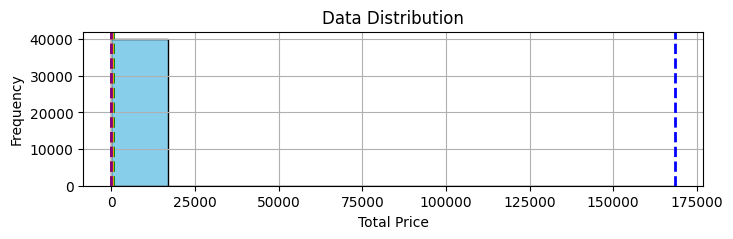

In [0]:
# Convert pyspark dataframe to pandas dataframe
invoice_pd = invoice.select("total_price").toPandas()

# Calculate summary statistics on the invoice dataframe
min = invoice_pd["total_price"].min()
mean = invoice_pd["total_price"].mean()
median = invoice_pd["total_price"].median()
mode = invoice_pd["total_price"].mode()[0]
max = invoice_pd["total_price"].max()

# Plot the histogram of the total_price column
plt.figure(figsize=(8, 2))
plt.hist(invoice_pd["total_price"], bins=10, color='skyblue', edgecolor='black')

# Add summary statistics to the histogram plot
plt.axvline(min, color='red', linestyle='dashed', linewidth=2, label='Minimum')
plt.axvline(mean, color='green', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median, color='orange', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mode, color='purple', linestyle='dashed', linewidth=2, label='Mode')
plt.axvline(max, color='blue', linestyle='dashed', linewidth=2, label='Maximum')

plt.title("Data Distribution")
plt.xlabel("Total Price")
plt.ylabel("Frequency")
plt.grid(True)

print("Minimum:", round(min, 2))
print("Mean:", round(mean, 2))
print("Median:", round(median, 2))
print("Mode:", round(mode, 2))
print("Maximum:", round(max, 2))

plt.show()

Remove outliers by using the first 85 quantiles of the data

Minimum: 0.19
Mean: 271.68
Median: 256.23
Mode: 15.0
Maximum: 724.25


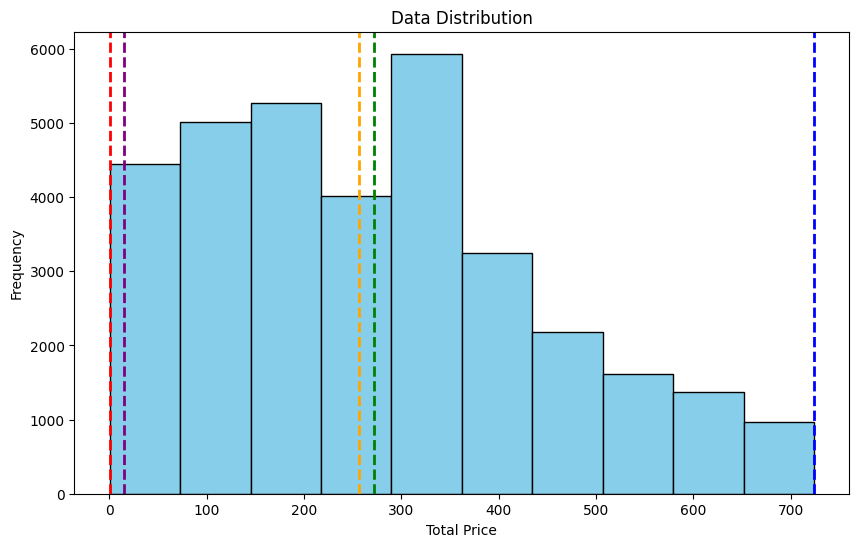

In [0]:
# Convert pyspark dataframe to pandas dataframe
invoice_pd = invoice.select("total_price").toPandas()

# Calculate the first 85 quantiles (from 1st percentile to 85th percentile)
quantiles = np.quantile(invoice_pd["total_price"], np.linspace(0, 0.85, 86))

# Define the minimum and maximum value for the x-axis from the quantiles
min_value = quantiles[0]
max_value = quantiles[-1]

# Filter the dataframe to include only values between the min and max quantile values
invoice_pd = invoice_pd[invoice_pd["total_price"].between(min_value, max_value)]

# Calculate the summary statistics for the filtered dataframe
min = invoice_pd["total_price"].min()
mean = invoice_pd["total_price"].mean()
median = invoice_pd["total_price"].median()
mode = invoice_pd["total_price"].mode()[0]
max = invoice_pd["total_price"].max()

# Plot the histogram of the total_price column, but only for the range between min and max quantile values
plt.figure(figsize=(10, 6))
plt.hist(invoice_pd["total_price"], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Data Distribution")
plt.xlabel("Total Price")
plt.ylabel("Frequency")

# Add summary statistics to the histogram plot
plt.axvline(min, color='red', linestyle='dashed', linewidth=2, label='Minimum')
plt.axvline(mean, color='green', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median, color='orange', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mode, color='purple', linestyle='dashed', linewidth=2, label='Mode')
plt.axvline(max, color='blue', linestyle='dashed', linewidth=2, label='Maximum')

print("Minimum:", round(min, 2))
print("Mean:", round(mean, 2))
print("Median:", round(median, 2))
print("Mode:", round(mode, 2))
print("Maximum:", round(max, 2))

# Show the plot
plt.show()

# Monthly Placed and Canceled Orders

Calculate the net amount of orders placed each month

In [0]:
from pyspark.sql.functions import year, month, countDistinct, count, isnull

placed_orders_df = spark.sql("SELECT * FROM online_retail_ii")

# Create month column by combining the year and month
placed_orders_df = placed_orders_df.withColumn("month", year(placed_orders_df.invoice_date) * 100 + month(placed_orders_df.invoice_date))

# Finding the number of cancelled orders per month
cancelled_orders_df = placed_orders_df.filter(placed_orders_df.invoice.startswith("C"))
cancelled_orders_df = cancelled_orders_df.groupBy("month").agg(countDistinct("invoice").alias("cancelled_invoices_count"))

# Findind the number of placed orders per month
placed_orders_df = placed_orders_df.filter(~placed_orders_df.invoice.startswith("C"))
placed_orders_df = placed_orders_df.groupBy("month").agg(countDistinct("invoice").alias("placed_invoices_count"))

monthly_orders_df = placed_orders_df.join(cancelled_orders_df, "month", "inner")

# Find net amount of orders by subtracting cancelled orders from placed orders
monthly_orders_df = monthly_orders_df.withColumn("total_invoices", monthly_orders_df.placed_invoices_count - (monthly_orders_df.cancelled_invoices_count))
monthly_orders_df = monthly_orders_df.orderBy(["month", "total_invoices"], ascending = True)
display(monthly_orders_df)

month placed_invoices_count cancelled_invoices_count total_invoices 200912 1929 401 1528 201001 1333 300 1033 201002 1729 240 1489 201003 1960 407 1553 201004 1588 304 1284 201005 2011 407 1604 201006 1859 357 1502 201007 1673 344 1329 201008 1604 273 1331 201009 2004 371 1633 201010 2489 476 2013 201011 3093 576 2517 201012 1699 326 1373 201101 1216 260 956 201102 1174 219 955 201103 1665 318 1347 201104 1504 240 1264 201105 1848 314 1534 201106 1683 329 1354 201107 1657 270 1387 201108 1459 278 1181 201109 1994 333 1661 201110 2275 362 1913 201111 3021 441 2580 201112 869 146 723

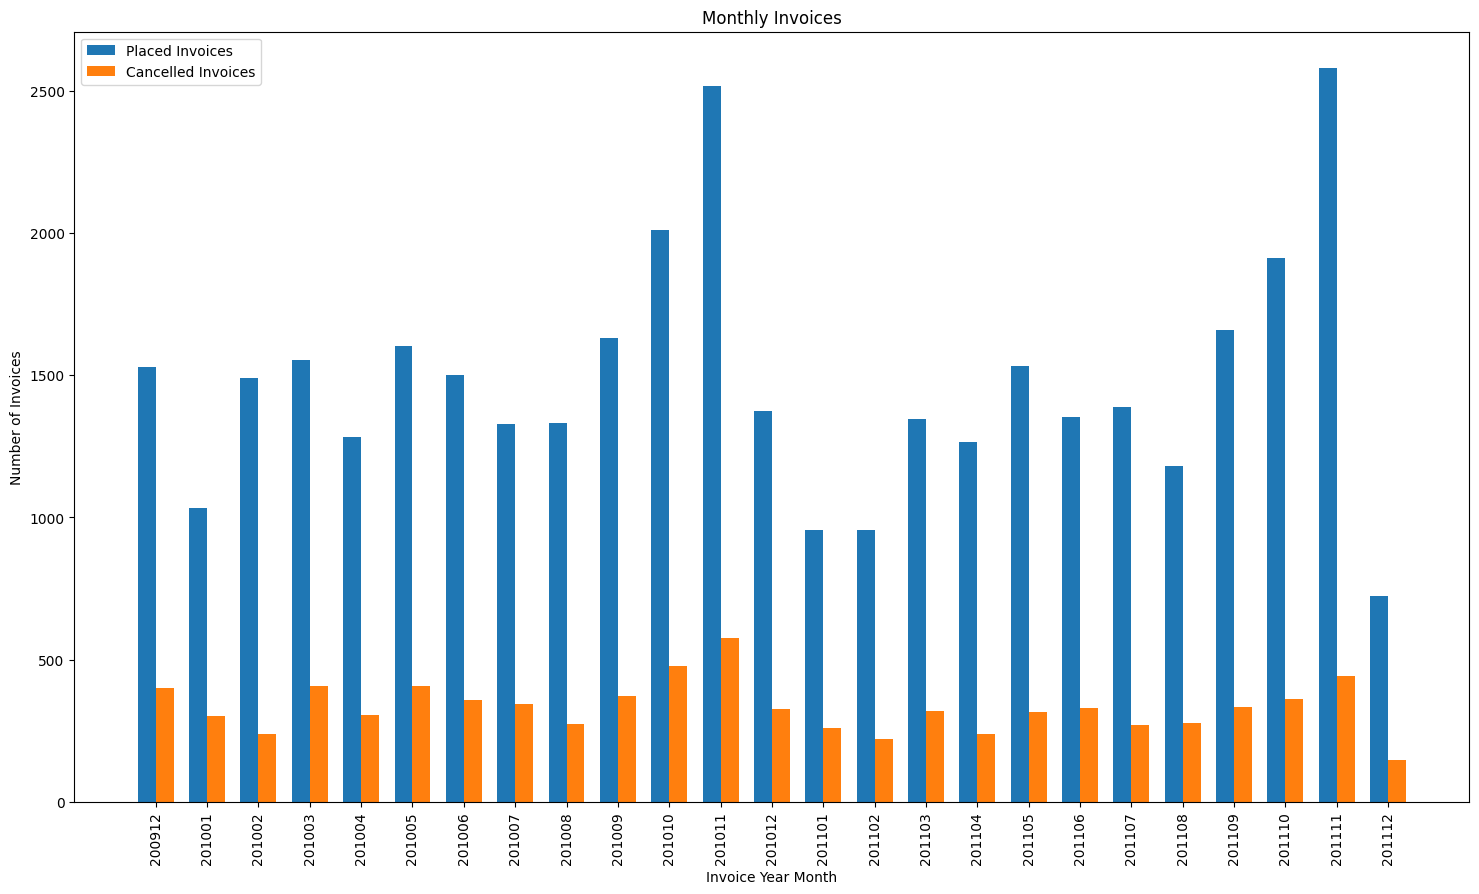

In [0]:
# Convert pyspark dataframe to pandas dataframe
monthly_pd = monthly_orders_df.toPandas()

# Specify the x-axis as the length of the "month" column
x = range(len(monthly_pd["month"]))
width = 0.35

plt.figure(figsize=(18, 10))

# Plotting the bars for placed and cancelled orders
plt.bar([i - width/2 for i in x], monthly_pd["total_invoices"], width = width, label="Placed Invoices")
plt.bar([i + width/2 for i in x], monthly_pd["cancelled_invoices_count"], width = width, label="Cancelled Invoices")
plt.xlabel("Invoice Year Month")
plt.ylabel("Number of Invoices")
plt.title("Monthly Invoices")

plt.xticks(x, monthly_pd["month"], rotation = 90)
plt.legend()
plt.show()

# Monthly Sales

Calculate monthly sales 

In [0]:
from pyspark.sql.functions import year, month, sum

monthly_sales = spark.sql("SELECT * FROM online_retail_ii")

# Create month column by combining the year and month
monthly_sales = monthly_sales.withColumn("month", year(monthly_sales.invoice_date) * 100 + month(monthly_sales.invoice_date))
# Calculate the total price for each row
monthly_sales = monthly_sales.withColumn("total_price", monthly_sales.quantity * monthly_sales.price)

# Sum the total sales per month
monthly_sales = monthly_sales.groupBy("month").agg(sum("total_price").alias("total_sales")).orderBy("month")
display(monthly_sales)


month total_sales 200912 799847.1075055711 201001 624032.8896515106 201002 533091.424455221 201003 765848.757825097 201004 590580.4300854017 201005 615322.8286303803 201006 679786.6077747606 201007 575236.3596651554 201008 656776.3393343091 201009 853650.4293782803 201010 1045168.3482284844 201011 1422654.6372941246 201012 1126445.4675593823 201101 560000.258079961 201102 498062.6492906958 201103 683267.079093039 201104 493207.11913273286 201105 723333.5078510791 201106 691123.1178948507 201107 681300.1086762528 201108 682680.5088247135 201109 1019687.6194412147 201110 1070704.6672792248 201111 1461756.2452435382 201112 433686.0082483664

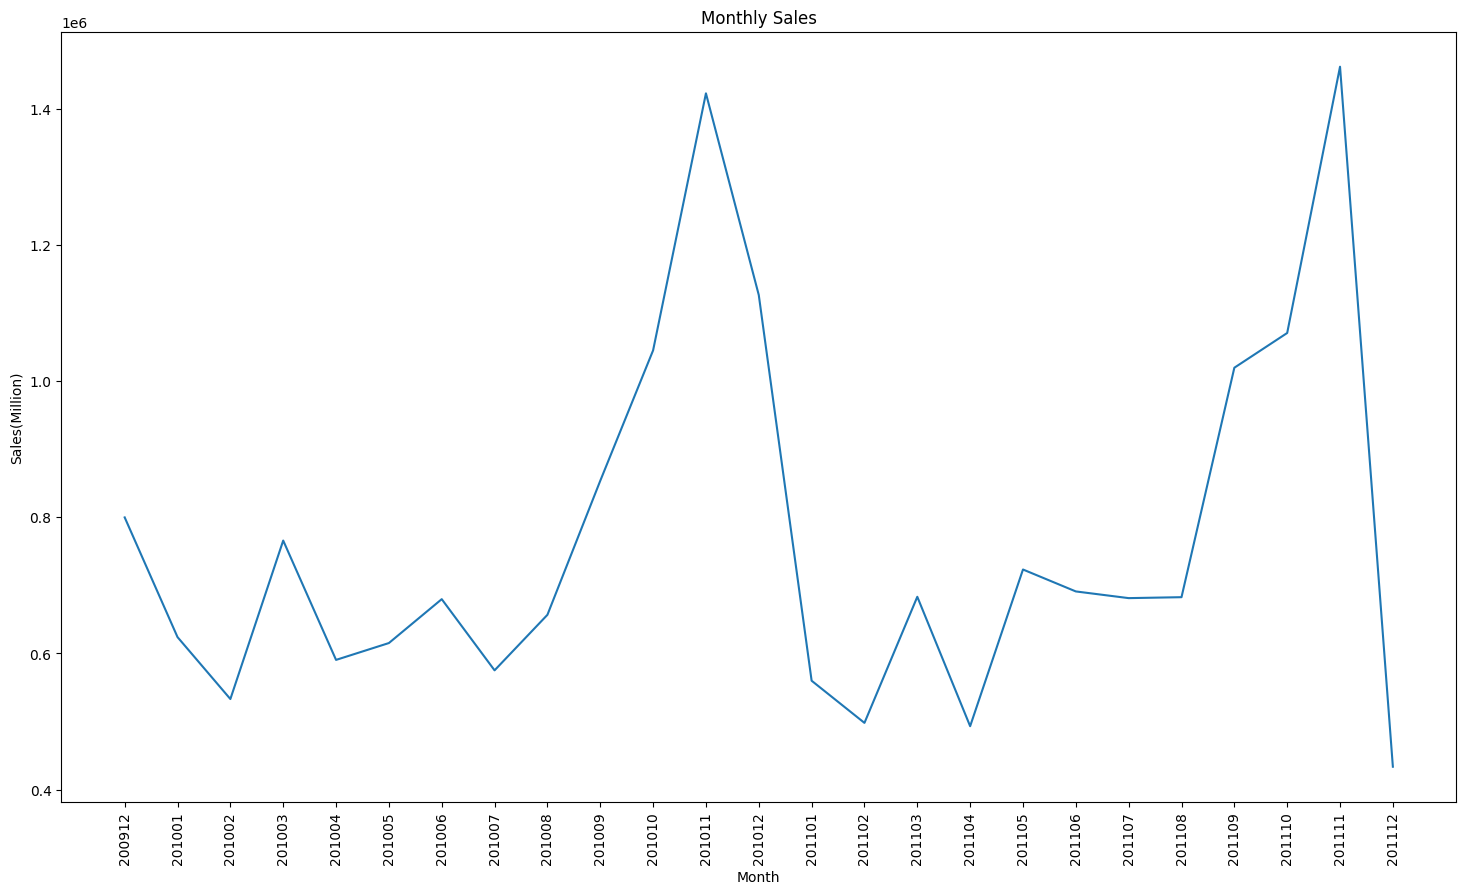

In [0]:
# Convert pyspark dataframe to pandas dataframe
monthly_sales_pd = monthly_sales.toPandas()

# Specify the x-axis as the length of the "month" column
x = range(len(monthly_sales_pd["month"]))
# Set the y-axis as the total sales column
y = monthly_sales_pd["total_sales"]

plt.figure(figsize=(18,10))

plt.plot(x, y)
plt.xlabel("Month")
plt.ylabel("Sales(Million)")
plt.title("Monthly Sales")
plt.xticks(x, monthly_sales_pd["month"], rotation = 90)

plt.show()

# Monthly Sales Growth


Calculate the growth of sales on a month to month basis

In [0]:
from pyspark.sql.window import Window
from pyspark.sql.functions import lag

monthly_growth = monthly_sales

# Calculate the growth of the sales per month as a percentage by subtracting the previous month's sales from the current month's sales and dividing by the previous month's sales
monthly_growth = monthly_growth.withColumn("growth", (monthly_growth.total_sales - lag(monthly_growth.total_sales, 1).over(Window.orderBy("month"))) / lag(monthly_growth.total_sales, 1).over(Window.orderBy("month")))
monthly_growth = monthly_growth.orderBy("month")
display(monthly_growth)

month total_sales growth 200912 799847.1075055711 null 201001 624032.8896515106 -0.2198097813997982 201002 533091.424455221 -0.14573184635680916 201003 765848.757825097 0.43661804090684114 201004 590580.4300854017 -0.22885501340686726 201005 615322.8286303803 0.041895053212990266 201006 679786.6077747606 0.104764159795383 201007 575236.3596651554 -0.15379862873710315 201008 656776.3393343091 0.1417503923371917 201009 853650.4293782803 0.29975819507066515 201010 1045168.3482284844 0.2243516927528379 201011 1422654.6372941246 0.3611727141426195 201012 1126445.4675593823 -0.208208768291178 201101 560000.258079961 -0.5028607471844263 201102 498062.6492906958 -0.11060282186588073 201103 683267.079093039 0.3718496660331743 201104 493207.11913273286 -0.27816349678750746 201105 723333.5078510791 0.4665917822171869 201106 691123.1178948507 -0.0445304822832291 201107 681300.1086762528 -0.014213110463615543 201108 682680.5088247135 0.0020261264175384284 201109 1019687.6194412147 0.4936527500934289 201110 1070704.6672792248 0.05003203615041173 201111 1461756.2452435382 0.3652282369871584 201112 433686.0082483664 -0.703311677538883

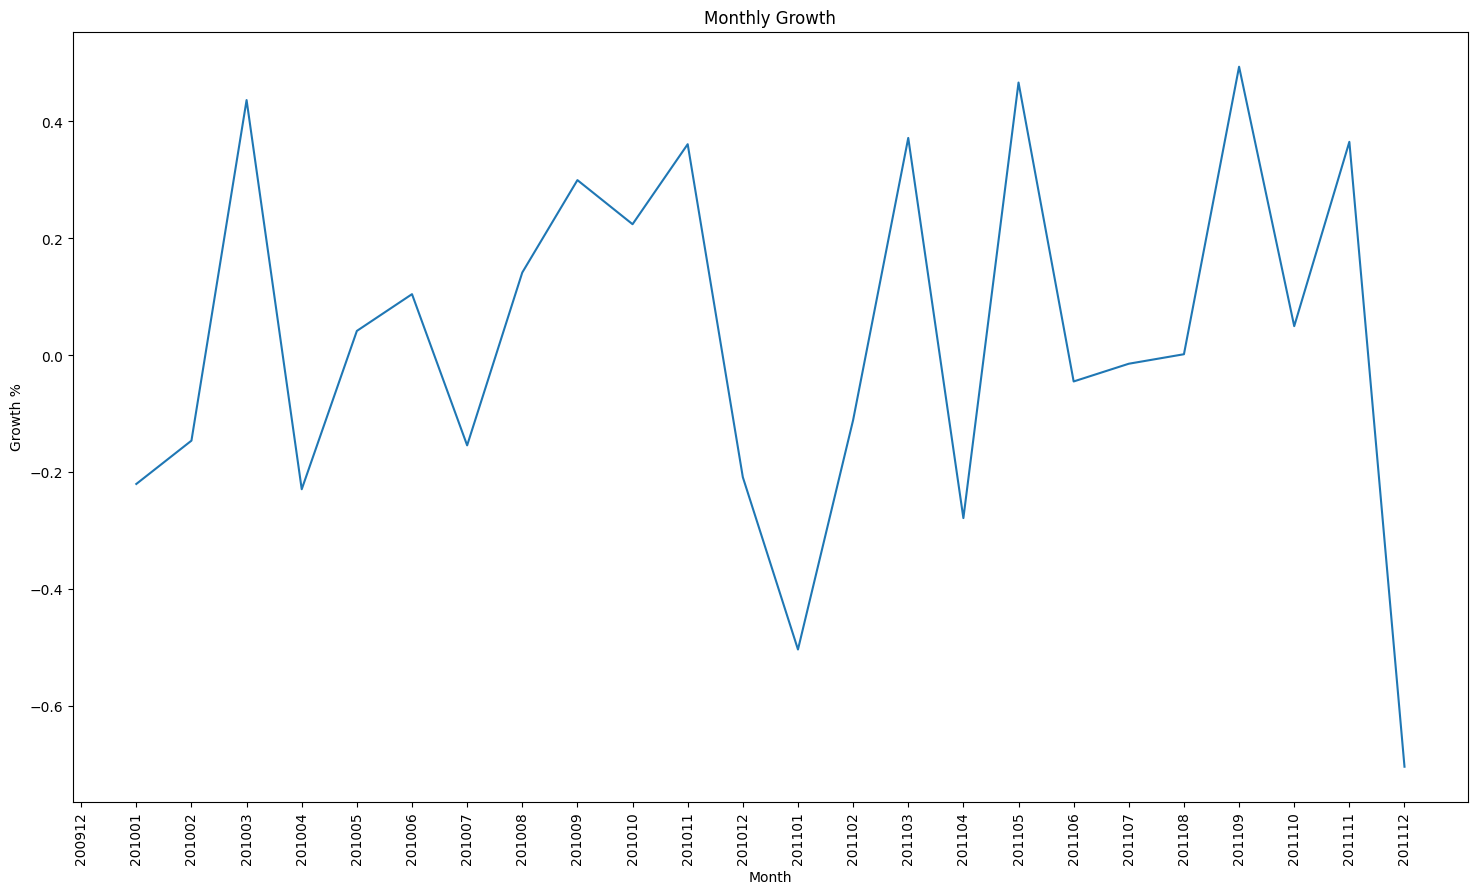

In [0]:
# Convert pyspark dataframe to pandas dataframe
monthly_growth_pd = monthly_growth.toPandas()

# Specify the x-axis as the length of the "month" column
x = range(len(monthly_growth_pd["month"]))
# Set the y-axis as the growth column
y = monthly_growth_pd["growth"]

plt.figure(figsize=(18,10))

plt.plot(x, y)
plt.xlabel("Month")
plt.ylabel("Growth %")
plt.title("Monthly Growth")
plt.xticks(x, monthly_growth_pd["month"], rotation = 90)

plt.show()

# Monthly Active Users

Show the number of active users per month

In [0]:
from pyspark.sql.functions import year, month, countDistinct

monthly_active_users = spark.sql("SELECT * FROM online_retail_ii")

# Create month column by combining the year and month
monthly_active_users = monthly_active_users.withColumn("month", year(monthly_active_users.invoice_date) * 100 + month(monthly_active_users.invoice_date))
# Calculate the number of unique customers per month
monthly_active_users = monthly_active_users.groupBy("month").agg(countDistinct("customer_id").alias("active_users")).orderBy("month")
display(monthly_active_users)

month active_users 200912 1045 201001 786 201002 807 201003 1111 201004 998 201005 1062 201006 1095 201007 988 201008 964 201009 1202 201010 1577 201011 1683 201012 948 201101 783 201102 798 201103 1020 201104 899 201105 1079 201106 1051 201107 993 201108 980 201109 1302 201110 1425 201111 1711 201112 686

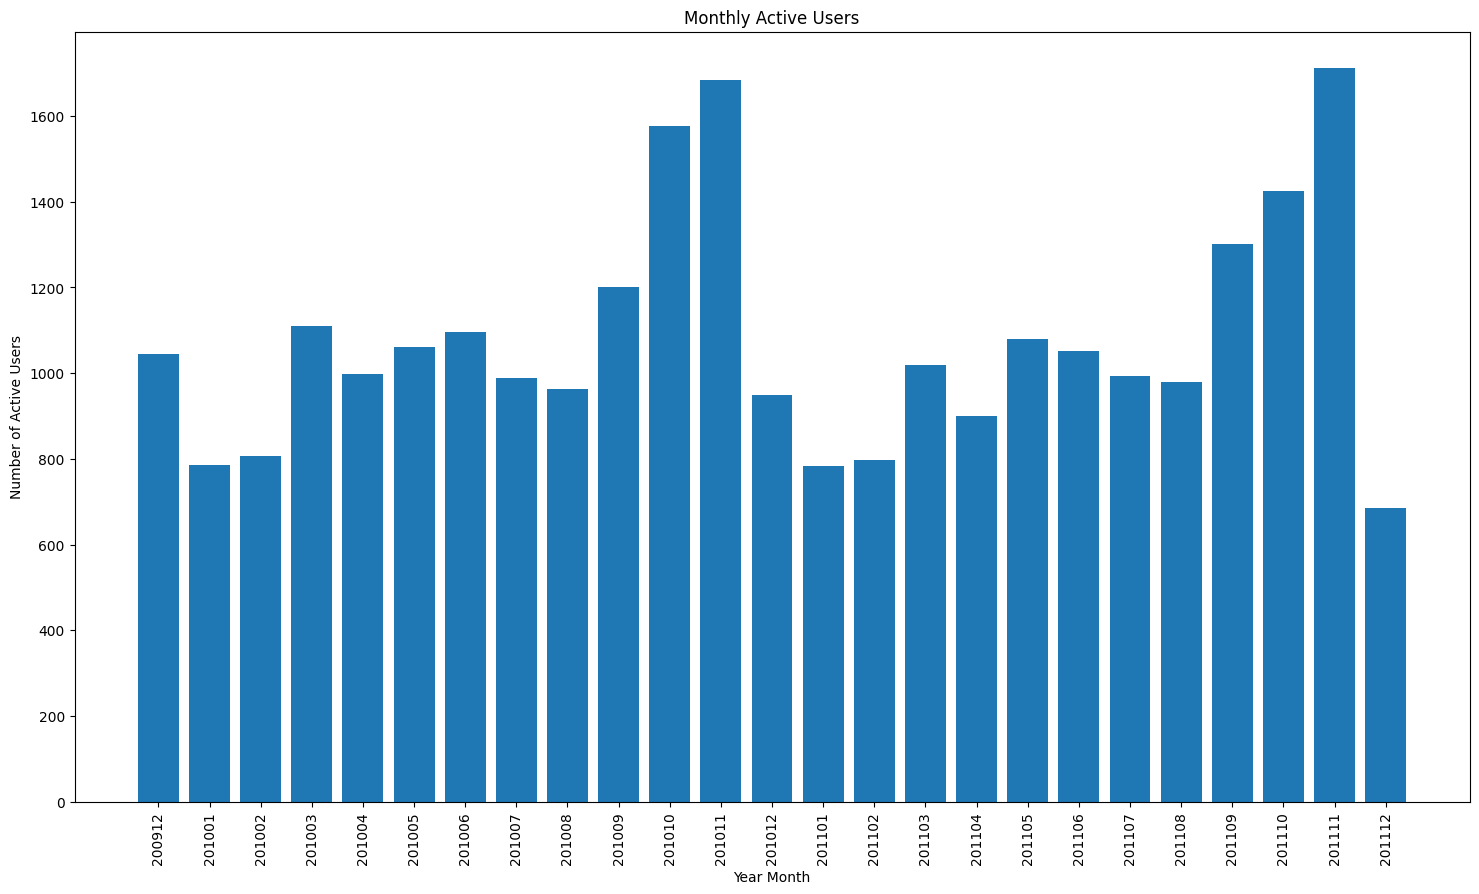

In [0]:
# Convert pyspark dataframe to pandas dataframe
monthly_active_users_pd = monthly_active_users.toPandas()

# Specify the x-axis as the length of the "month" column
x = range(len(monthly_active_users_pd["month"]))
# Set the y-axis as the active users column
y = monthly_active_users_pd["active_users"]

plt.figure(figsize=(18,10))
plt.bar(x, y, width = 0.8, label="Active Users")
plt.xlabel("Year Month")
plt.ylabel("Number of Active Users")
plt.title("Monthly Active Users")

plt.xticks(x, monthly_active_users_pd["month"], rotation = 90)
plt.show()

# New and Existing Users



Show the number of new users and existing users per month

In [0]:
from pyspark.sql.functions import min, count, countDistinct

df = spark.sql("SELECT * FROM online_retail_ii")

# Create month column by combining the year and month
df = df.withColumn("month", year(df.invoice_date) * 100 + month(df.invoice_date))

# Find the first month each customer made a purchase
new_users = df.groupBy("customer_id").agg(min("month").alias("first_order_month"))
existing_users = df.join(new_users, "customer_id", "inner")
# Filter out invoices made during a customer's first purchase month
existing_users = existing_users.filter(existing_users.month > existing_users.first_order_month)

# Calculate the number of new and existing users per month
new_users_count = new_users.groupBy("first_order_month").agg(count("customer_id").alias("new_customers_count")).orderBy("first_order_month")
existing_users_count = existing_users.groupBy("month").agg(countDistinct("customer_id").alias("existing_customers_count")).orderBy("month")

# Join the new and existing users
new_ex = existing_users_count.join(new_users_count, existing_users_count.month == new_users_count.first_order_month, "right")
new_ex = new_ex.orderBy("month")

display(new_ex)

month existing_customers_count first_order_month new_customers_count null null 200912 1045 201001 392 201001 394 201002 444 201002 363 201003 675 201003 436 201004 707 201004 291 201005 808 201005 254 201006 826 201006 269 201007 805 201007 183 201008 806 201008 158 201009 960 201009 242 201010 1198 201010 379 201011 1361 201011 322 201012 871 201012 77 201101 712 201101 71 201102 675 201102 123 201103 842 201103 178 201104 794 201104 105 201105 971 201105 108 201106 943 201106 108 201107 891 201107 102 201108 874 201108 106 201109 1115 201109 187 201110 1204 201110 221 201111 1519 201111 192 201112 658 201112 28

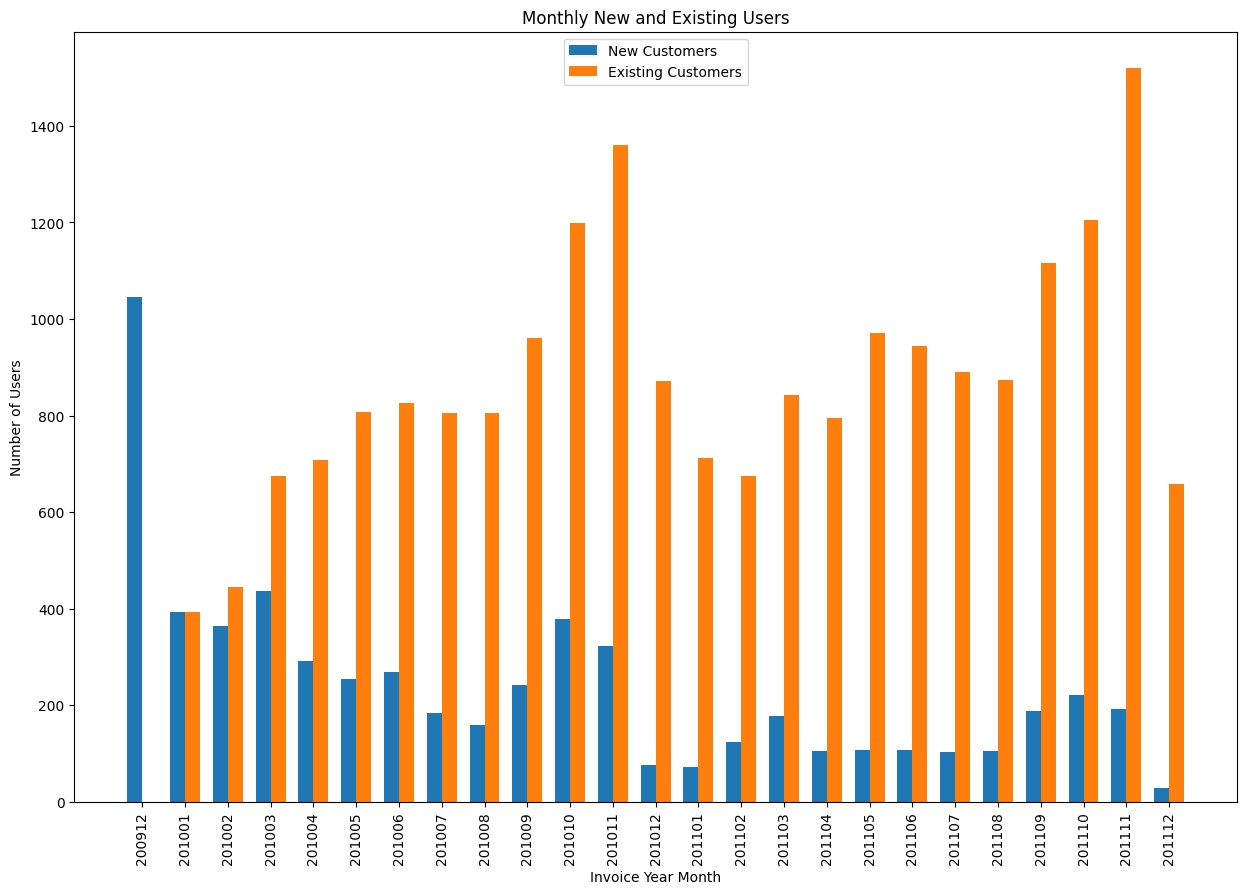

In [0]:
# Convert pyspark dataframe to pandas dataframe
new_ex_pd = new_ex.toPandas()

# Specify the x-axis as the length of the "month" column
x = range(len(new_ex_pd["first_order_month"]))
width = 0.35
plt.figure(figsize=(15,10))

# Plot the new and existing users
plt.bar([i - width/2 for i in x], new_ex_pd["new_customers_count"], width, label="New Customers")
plt.bar([i + width/2 for i in x], new_ex_pd["existing_customers_count"], width, label="Existing Customers")

plt.xlabel("Invoice Year Month")
plt.ylabel("Number of Users")
plt.title("Monthly New and Existing Users")

plt.xticks(x, new_ex_pd["first_order_month"], rotation = 90)
plt.legend()
plt.show()


## Finding RFM

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in the retail and professional services industries. ([wikipedia](https://en.wikipedia.org/wiki/RFM_(market_research)))

Optional Reading: [Making Your Database Pay Off Using Recency Frequency and Monetary Analysis](http://www.dbmarketing.com/2010/03/making-your-database-pay-off-using-recency-frequency-and-monetary-analysis/)


RFM stands for three dimensions:

- Recency – How recently did the customer purchase?

- Frequency – How often do they purchase?

- Monetary Value – How much do they spend?

Note: To simplify the problem, let's keep all placed and canceled orders.


**Sample RFM table**

![](https://i.imgur.com/sXFIg6u.jpg)

In [0]:
from pyspark.sql.functions import countDistinct, sum, max, year, month, round

rfm = spark.sql("SELECT * FROM online_retail_ii WHERE customer_id IS NOT NULL")

# Create month column by combining the year and month
rfm = rfm.withColumn("month", year(rfm.invoice_date) * 100 + month(rfm.invoice_date))
# Calculate the total price for each row
rfm = rfm.withColumn("total_price", rfm.quantity * rfm.price)

# Calculate RFM metrics
rfm = rfm.groupBy("customer_id").agg( max("month").alias("recency"), countDistinct("invoice").alias("invoice_amount"), round(sum("total_price"), 2).alias("monetary")).orderBy("customer_id")
display(rfm)

customer_id recency invoice_amount monetary 12346.0 201101 17 -64.68 12347.0 201112 8 5633.32 12348.0 201109 5 2019.4 12349.0 201111 5 4404.54 12350.0 201102 1 334.4 12351.0 201011 1 300.93 12352.0 201111 13 1889.21 12353.0 201105 2 406.76 12354.0 201104 1 1079.4 12355.0 201105 2 947.61 12356.0 201111 6 6373.68 12357.0 201111 3 18287.66 12358.0 201112 5 3887.07 12359.0 201112 14 8714.89 12360.0 201110 9 4212.89 12361.0 201102 4 511.25 12362.0 201112 14 5284.58 12363.0 201108 2 552.0 12364.0 201112 4 1313.1 12365.0 201102 3 320.69 12366.0 201003 1 500.24 12367.0 201112 1 168.9 12368.0 201003 1 917.7 12369.0 201010 3 1791.15 12370.0 201110 7 4320.31 12371.0 201110 5 4067.38 12372.0 201109 3 1298.04 12373.0 201102 3 1127.65 12374.0 201111 4 2989.22 12375.0 201112 3 455.42 12376.0 201011 2 503.15 12377.0 201101 4 3426.32 12378.0 201108 2 5416.32 12379.0 201109 5 1618.27 12380.0 201111 15 7888.0 12381.0 201112 6 1803.96 12382.0 201001 1 -18.38 12383.0 201106 6 1839.31 12384.0 201111 3 566.16 12385.0 201011 2 1923.4 12386.0 201101 2 660.8 12387.0 201010 1 143.94 12388.0 201111 8 3901.11 12389.0 201011 3 1433.33 12390.0 201109 1 549.84 12391.0 201111 7 2747.82 12392.0 201004 1 234.75 12393.0 201109 7 2376.75 12394.0 201110 2 1272.48 12395.0 201111 18 5046.92 12396.0 201002 1 931.43 12397.0 201111 2 2409.9 12398.0 201110 1 1635.66 12399.0 201108 7 1962.3 12400.0 201010 1 205.25 12401.0 201102 1 84.3 12402.0 201101 7 1244.15 12403.0 201110 3 1001.36 12404.0 201001 1 63.24 12405.0 201107 1 1710.39 12406.0 201111 7 6072.21 12407.0 201110 5 1708.12 12408.0 201111 14 4279.64 12409.0 201109 13 23090.47 12410.0 201102 4 1001.46 12411.0 201010 1 346.9 12412.0 201109 8 2581.03 12413.0 201110 6 935.5 12414.0 201105 8 692.41 12415.0 201111 33 143269.29 12416.0 201002 1 202.56 12417.0 201112 27 6708.21 12418.0 201108 5 2016.95 12419.0 201011 2 503.01 12420.0 201110 1 600.39 12421.0 201111 8 1092.83 12422.0 201109 21 4119.35 12423.0 201112 11 2612.19 12424.0 201106 7 3289.78 12425.0 201109 3 1680.81 12426.0 201105 3 1311.41 12427.0 201111 5 1011.87 12428.0 201111 12 7877.2 12429.0 201111 9 7435.51 12430.0 201110 1 256.4 12431.0 201111 33 10719.41 12432.0 201110 5 5059.32 12433.0 201112 11 20428.86 12434.0 201109 5 1062.48 12435.0 201109 6 13925.93 12436.0 201109 1 509.01 12437.0 201112 47 12394.85 12438.0 201111 2 2906.85 12439.0 201001 3 1104.48 12440.0 201009 3 768.15 12441.0 201012 1 347.1 12442.0 201112 1 172.06 12443.0 200912 1 485.31 12444.0 201111 5 5005.46 12445.0 201111 3 426.48 12446.0 201110 1 1002.31 12447.0 201104 1 476.49 12448.0 201110 1 449.45 12449.0 201111 6 4835.89 12450.0 201107 7 666.95 12451.0 201111 10 12546.53 12452.0 201111 3 428.57 12453.0 201107 1 707.09 12454.0 201110 9 4292.71 12455.0 201109 10 5879.95 12456.0 201110 4 3153.89 12457.0 201110 14 2472.31 12458.0 201109 4 1777.49 12459.0 201004 1 454.36 12460.0 201009 1 326.65 12461.0 201109 2 826.88 12462.0 201112 4 1124.01 12463.0 201110 7 1303.63 12464.0 201111 8 1212.05 12465.0 201112 3 733.89 12466.0 201001 1 56.73 12467.0 201011 2 0.0 12468.0 201107 10 3624.55 12469.0 201007 2 3070.54 12470.0 201001 1 211.95 12471.0 201112 129 37948.61 12472.0 201111 37 16956.69 12473.0 201111 9 2848.23 12474.0 201111 54 11966.45 12475.0 201110 2 1149.64 12476.0 201112 38 13715.62 12477.0 201111 12 20173.64 12478.0 201112 1 680.99 12479.0 201112 3 477.3 12480.0 201111 8 5435.1 12481.0 201111 18 12217.03 12482.0 201009 32 21893.53 12483.0 201111 27 4846.87 12484.0 201111 16 6303.85 12485.0 201006 1 708.1 12486.0 201010 1 1037.28 12487.0 200912 2 259.8 12488.0 201111 3 1298.66 12489.0 201101 1 334.93 12490.0 201112 22 9818.64 12491.0 201111 1 460.4 12492.0 201110 3 715.21 12493.0 201106 3 416.79 12494.0 201111 17 1743.52 12495.0 201003 2 323.4 12496.0 201003 2 54.09 12497.0 201109 4 6211.75 12498.0 201111 3 403.7 12499.0 201005 1 393.72 12500.0 201111 25 5872.31 12501.0 201101 2 2089.68 12502.0 201109 5 3723.87 12503.0 201101 2 0.0 12504.0 201111 6 411.0 12505.0 201102 3 908.0 12506.0

# RFM Segmentation

Segment the customers into 11 groups
- About to Sleep
- At Risk
- Can't Lose
- Champions
- Hibernating
- Loyal Customers
- Need Attention
- New Customers
- Potential Loyalists
- Promising

In [0]:
from pyspark.sql.functions import sum, max, to_date, lit, datediff, count, round
from datetime import datetime

df = spark.sql("SELECT * FROM online_retail_ii WHERE customer_id IS NOT NULL")

# Set today's date as January 1st, 2012
today = to_date(lit("2012-01-01"))

# Filter out negative quantities and prices
df = df.filter((df.quantity > 0) & (df.price > 0))

# Calculate the total price for each row
df = df.withColumn("total_price", df.quantity * df.price)

# Calculate RFM metrics
df_x = df.groupBy("customer_id").agg(round(sum("total_price"), 0).alias("Monetary"), datediff(today, max("invoice_date")).alias("Recency")).orderBy("customer_id")

# Sum the total price for each invoice
df_y = df.groupBy("customer_id", "invoice").agg(sum("total_price").alias("total_price"))

# Calculate the number of unique invoices for each customer
df_z = df_y.groupBy("customer_id").agg(count("total_price").alias("Frequency"))

rfm_table = df_x.join(df_z, "customer_id", "inner").orderBy("customer_id")

display(rfm_table)

customer_id Monetary Recency Frequency 12346.0 77556.0 348 12 12347.0 5633.0 25 8 12348.0 2019.0 98 5 12349.0 4429.0 41 4 12350.0 334.0 333 1 12351.0 301.0 398 1 12352.0 2850.0 59 10 12353.0 407.0 227 2 12354.0 1079.0 255 1 12355.0 948.0 237 2 12356.0 6374.0 45 6 12357.0 18288.0 56 3 12358.0 3887.0 24 5 12359.0 8936.0 80 10 12360.0 4253.0 75 8 12361.0 511.0 310 4 12362.0 5356.0 26 11 12363.0 552.0 132 2 12364.0 1313.0 30 4 12365.0 641.0 314 2 12366.0 500.0 656 1 12367.0 169.0 27 1 12368.0 918.0 651 1 12369.0 1791.0 436 3 12370.0 4320.0 74 7 12371.0 4067.0 67 5 12372.0 1298.0 94 3 12373.0 1128.0 334 3 12374.0 2989.0 48 4 12375.0 457.0 33 2 12376.0 503.0 412 2 12377.0 3426.0 338 4 12378.0 5416.0 152 2 12379.0 1620.0 104 4 12380.0 9676.0 44 11 12381.0 1845.0 27 5 12383.0 1851.0 207 5 12384.0 585.0 51 2 12385.0 1938.0 402 1 12386.0 661.0 360 2 12387.0 144.0 438 1 12388.0 3901.0 38 8 12389.0 1433.0 425 3 12390.0 550.0 102 1 12391.0 2773.0 44 6 12392.0 235.0 614 1 12393.0 2399.0 95 6 12394.0 1272.0 86 2 12395.0 5067.0 42 15 12396.0 931.0 697 1 12397.0 2410.0 58 2 12398.0 1636.0 68 1 12399.0 1962.0 142 7 12400.0 205.0 437 1 12401.0 84.0 326 1 12402.0 1257.0 346 6 12403.0 1019.0 72 2 12404.0 63.0 705 1 12405.0 1710.0 171 1 12406.0 6390.0 45 5 12407.0 1708.0 72 5 12408.0 4341.0 55 8 12409.0 23419.0 101 7 12410.0 1014.0 331 3 12411.0 347.0 432 1 12412.0 2597.0 97 6 12413.0 999.0 89 4 12414.0 952.0 240 6 12415.0 144458.0 47 28 12416.0 203.0 679 1 12417.0 6817.0 26 20 12418.0 2021.0 135 4 12419.0 503.0 408 2 12420.0 600.0 86 1 12421.0 1099.0 38 6 12422.0 5232.0 118 17 12423.0 2622.0 23 10 12424.0 3340.0 185 4 12425.0 1741.0 101 2 12426.0 1345.0 217 2 12427.0 1129.0 44 3 12428.0 7956.0 48 9 12429.0 7486.0 32 8 12430.0 256.0 66 1 12431.0 10858.0 58 27 12432.0 5059.0 65 5 12433.0 20581.0 23 10 12434.0 1103.0 107 3 12435.0 13926.0 102 6 12436.0 509.0 122 1 12437.0 12683.0 24 39 12438.0 2907.0 37 2 12439.0 1158.0 705 2 12440.0 859.0 485 2 12441.0 347.0 389 1 12442.0 172.0 26 1 12443.0 485.0 755 1 12444.0 5005.0 44 5 12445.0 435.0 45 2 12446.0 1002.0 80 1 12447.0 476.0 266 1 12448.0 449.0 67 1 12449.0 4836.0 45 6 12450.0 688.0 179 5 12451.0 12670.0 33 8 12452.0 431.0 39 2 12453.0 707.0 157 1 12454.0 16680.0 79 5 12455.0 5880.0 96 10 12456.0 3181.0 67 3 12457.0 2996.0 89 8 12458.0 1777.0 94 4 12459.0 454.0 628 1 12460.0 327.0 479 1 12461.0 827.0 117 2 12462.0 1190.0 41 2 12463.0 1345.0 76 4 12464.0 1212.0 33 8 12465.0 742.0 40 2 12466.0 57.0 705 1 12467.0 133.0 446 1 12468.0 3671.0 210 5 12469.0 3071.0 545 2 12470.0 212.0 712 1 12471.0 39964.0 25 79 12472.0 17881.0 55 19 12473.0 3939.0 52 5 12474.0 12424.0 40 31 12475.0 1150.0 76 2 12476.0 14115.0 38 23 12477.0 20276.0 45 9 12478.0 681.0 26 1 12479.0 527.0 34 1 12480.0 5465.0 51 7 12481.0 12361.0 45 15 12482.0 23691.0 599 29 12483.0 5121.0 40 19 12484.0 6370.0 55 12 12485.0 708.0 552 1 12486.0 1037.0 454 1 12487.0 285.0 753 1 12488.0 1299.0 32 3 12489.0 335.0 359 1 12490.0 9824.0 28 21 12491.0 460.0 61 1 12492.0 715.0 86 3 12493.0 434.0 188 2 12494.0 1873.0 38 9 12495.0 357.0 663 1 12496.0 54.0 643 2 12497.0 6248.0 104 3 12498.0 404.0 44 3 12499.0 394.0 583 1 12500.0 5955.0 46 19 12501.0 2169.0 359 1 12502.0 3724.0 118 5 12503.0 1126.0 607 1 12504.0 779.0 41 4 12505.0 955.0 431 1 12506.0 73.0 255 1 12507.0 1844.0 157 4 12508.0 398.0 49 2 12509.0 177.0 307 1 12510.0 5178.0 165 9 12511.0 3084.0 451 1 12512.0 138.0 89 2 12513.0 612.0 135 1 12514.0 1598.0 290 2 12515.0 384.0 376 1 12516.0 2649.0 100 4 12517.0 2503.0 51 5 12518.0 2057.0 23 5 12519.0 727.0 86 2 12520.0 2634.0 102 5 12521.0 600.0 165 1 12522.0 193.0 62 2 12523.0 4372.0 42 23 12524.0 11126.0 32 17 12525.0 974.0 521 3 12526.0 1317.0 23 3 12527.0 736.0 104 5 12528.0 1933.0 32 6 12529.0 316.0 551 1 12530.0 3759.0 82 9 12531.0 1933.0 37 2 12532.0 350.0 53 1 12533.0 1368.0 650 2 12534.0 1089.0 153 1 12535.0 716.0 114 2 12536.0 12602.0 66 3 12537.0 733.0 431 1 12538.0 640.0 52 2 12539.0 11215.0 45 7 12540.0 22254.0 42 33 12541.0 981.0 52 3 12

In [0]:
# Convert pyspark dataframe to pandas dataframe
rfm_table_pd = rfm_table.toPandas()

# Group the RFM metrics into scores of 1 to 5
rfm_table_pd['RecencyScore'] = pd.qcut(rfm_table_pd['Recency'],5,labels=[5,4,3,2,1])
rfm_table_pd['FrequencyScore'] = pd.qcut(rfm_table_pd['Frequency'].rank(method="first"),5,labels=[1,2,3,4,5])
rfm_table_pd['MonetaryScore'] = pd.qcut(rfm_table_pd['Monetary'],5,labels=[1,2,3,4,5])

rfm_table_pd.head()

customer_id  Monetary  Recency  ...  RecencyScore FrequencyScore MonetaryScore
0      12346.0   77556.0      348  ...             2              5             5
1      12347.0    5633.0       25  ...             5              4             5
2      12348.0    2019.0       98  ...             3              4             4
3      12349.0    4429.0       41  ...             5              3             5
4      12350.0     334.0      333  ...             2              1             2

[5 rows x 7 columns]

In [0]:
# Display the RFM scores for each customer
(rfm_table_pd['RecencyScore'].astype(str) + 
 rfm_table_pd['FrequencyScore'].astype(str) + 
 rfm_table_pd['MonetaryScore'].astype(str)).head()

0    255
1    545
2    344
3    535
4    212
dtype: object

In [0]:
# Create RFM score column for each customer
rfm_table_pd["RFM_SCORE"] = rfm_table_pd['RecencyScore'].astype(str) + rfm_table_pd['FrequencyScore'].astype(str) + rfm_table_pd['MonetaryScore'].astype(str)
rfm_table_pd.head()


customer_id  Monetary  Recency  ...  FrequencyScore MonetaryScore RFM_SCORE
0      12346.0   77556.0      348  ...               5             5       255
1      12347.0    5633.0       25  ...               4             5       545
2      12348.0    2019.0       98  ...               4             4       344
3      12349.0    4429.0       41  ...               3             5       535
4      12350.0     334.0      333  ...               1             2       212

[5 rows x 8 columns]

In [0]:
#segmenting of customers according to RecencyScore and FrequencyScore values
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

#creation of segment variable
rfm_table_pd['Segment'] = rfm_table_pd['RecencyScore'].astype(str) + rfm_table_pd['FrequencyScore'].astype(str)
rfm_table_pd['Segment'] = rfm_table_pd['Segment'].replace(seg_map, regex=True)

rfm_table_pd.head()

customer_id  Monetary  Recency  ...  MonetaryScore RFM_SCORE              Segment
0      12346.0   77556.0      348  ...              5       255           Can't Lose
1      12347.0    5633.0       25  ...              5       545            Champions
2      12348.0    2019.0       98  ...              4       344      Loyal Customers
3      12349.0    4429.0       41  ...              5       535  Potential Loyalists
4      12350.0     334.0      333  ...              2       212          Hibernating

[5 rows x 9 columns]

In [0]:
rfm_table_pd[["Segment", "Recency","Frequency","Monetary"]].groupby("Segment").agg(["mean","count"])


Recency        Frequency            Monetary      
                           mean count       mean count          mean count
Segment                                                                   
About to Sleep       129.618557   388   1.360825   388    531.956186   388
At Risk              395.942667   750   3.904000   750   1383.584000   750
Can't Lose           353.802817    71  15.929577    71   8355.619718    71
Champions             31.250000   852  19.214789   852  10795.529343   852
Hibernating          482.012484  1522   1.252300  1522    437.960578  1522
Loyal Customers       90.306016  1147   9.802964  1147   4199.729730  1147
Need Attention       136.241636   269   3.156134   269   1283.122677   269
New Customers         33.303571    56   1.000000    56    356.196429    56
Potential Loyalists   48.297335   713   2.589060   713   1155.415147   713
Promising             61.281818   110   1.000000   110    324.481818   110